In [ ]:
# MODEL COMPARISON!

In [1]:
# MODEL COMPARISON

env = 'colab'  # 'colab' only
assert env == 'colab'

using_gpu = False

git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Covid19Classifier/main/'
final_models_path = '/content/drive/MyDrive/UNIPD/HDA/Project/SavedModels/SuccessfulTrials/'

In [8]:
names = [
         # Names of final, fully-fit models for comparison
         'CNN',
         'Dropout',
         'AlexNet',
         'VGG16',
         'VGG19'
]
# names = [
#          'AlexNet',
#          'AlexNetNoCLAHE'
# ]

# Packages & functions

In [3]:
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}


if env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')

    
    files = [
            'DataProperties.py',
            'DatasetParameters.py',
            'Preprocessing.py',
            'PreprocessingParameters.py',
            
            'Model.py',
            'BNModel.py',
            'CNNModel.py',
            'VGG19Model.py',
            'VGG16Model.py',
            'AlexNetModel.py',
            'DropoutModel.py',
            'InceptionModel.py',
            'ResNetModel.py',

            'Utils.py',
            'ModelUtils.py',
            'TimeCallBack.py'
    ]

Mounted at /content/drive


In [4]:
%%capture
if env == 'colab':
    url_dict = {file: git_download_path + file for file in files}
    download_files(url_dict)

In [5]:
from os.path import isdir
from os.path import isfile
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import importlib

In [6]:
import DataProperties 
import PreprocessingParameters 
import Preprocessing
import DatasetParameters
import Utils
import CNNModel
import BNModel
import ResNetModel
import DropoutModel
import InceptionModel
import AlexNetModel
import VGG19Model
import VGG16Model
import Model
import ModelUtils
import TimeCallBack

def reload_all(modules_list):
    for module in modules_list:
        importlib.reload(module)

reload_all(
    [
        DataProperties,
        PreprocessingParameters,
        DatasetParameters,
        Utils,
        Preprocessing,

        Model,
        CNNModel,
        BNModel,
        DropoutModel,
        
        VGG16Model,
        ResNetModel,
        InceptionModel,
        ModelUtils,
        TimeCallBack,
        VGG19Model,
        AlexNetModel
    ]
)

from DataProperties import DataProperties
from PreprocessingParameters import PreprocessingParameters
from DatasetParameters import DatasetParameters
from Utils import *
from Preprocessing import *
from CNNModel import CNNModel
from BNModel import BNModel
from DropoutModel import DropoutModel
from VGG19Model import VGG19Model
from ResNetModel import ResNetModel
from InceptionModel import InceptionModel
from ModelUtils import ModelUtils
from TimeCallBack import TimeCallBack
from AlexNetModel import AlexNetModel
from VGG16Model import VGG16Model

# Download necessary data

In [9]:
assert isdir(final_models_path) == True
available_models = listdir(final_models_path)

for name in names:
    assert name in available_models

In [10]:
def load_train_times(model_names, base_dir):
    res = {name: None for name in model_names}
    
    for name in model_names:
        model_dir = f'{base_dir}{name}/'
        assert(isdir(model_dir))

        file_path = f'{model_dir}training_time.csv'
        res[name] = pd.read_csv(file_path)

    return res

train_time_dict = load_train_times(names, base_dir = final_models_path)

In [11]:
def load_test_metrics(model_names, base_dir):
    
    res = {name: None for name in model_names}
    for name in model_names:
        model_dir = f'{base_dir}{name}/'
        assert isdir(model_dir)

        file_path = f'{model_dir}test_metrics_res.csv'
        res[name] = pd.read_csv(file_path)
    return res

test_metrics_dict = load_test_metrics(
    model_names = names,
    base_dir = final_models_path
)

In [12]:
def load_histories(model_names, base_dir):
    res = {name: None for name in model_names}

    for name in names:
        history_dir = f'{base_dir}{name}/Histories/'
        assert isdir(history_dir) == True

        file_path = f'{history_dir}{name}_history.csv'
        assert isfile(file_path)

        res[name] = pd.read_csv(file_path)
    
    return res


histories_dict = load_histories(
    model_names = names,
    base_dir = final_models_path
)

# Summary of learning curves

In [13]:
def plot_learning_curves(
    names, 
    hist_dict, 
    metrics_name, 
    figsize = (10, 10),
    title = 'PUT TITLE',
    ylabel = 'PUT LABEL',
    plot_validation = False
):

    fig, ax = plt.subplots(figsize = figsize)

    plt_params_dict = dict(
        linestyle = '--',
        marker = 'o',
        markersize = 8,
        markerfacecolor = 'white',
        linewidth = 2.5
    )

    fontsize = 20  # Axis writing
    ticksize = 20  # Ticks writing
    legendsize = 19

    for name in names:
        data = hist_dict[name][metrics_name]
        ax.plot(data, **plt_params_dict)
        
        if plot_validation:
            val_data = hist_dict[name][f'val_{metrics_name}']
            ax.plot(val_data, **plt_params_dict)

    ax.tick_params(axis = 'both', labelsize = ticksize)
    ax.set_title(title, fontsize = fontsize)
    ax.set_xlabel('Epoch', fontsize = fontsize)
    ax.set_ylabel(ylabel, fontsize = fontsize)
    ax.grid()

    
    legend_names = []
    if plot_validation:
        pairs = [[name, f'{name} (val)'] for name in names]
        for p in pairs:
            legend_names.append(p[0])
            legend_names.append(p[1])
            
    else:
        legend_names = names
    ax.legend(legend_names, fontsize = legendsize)

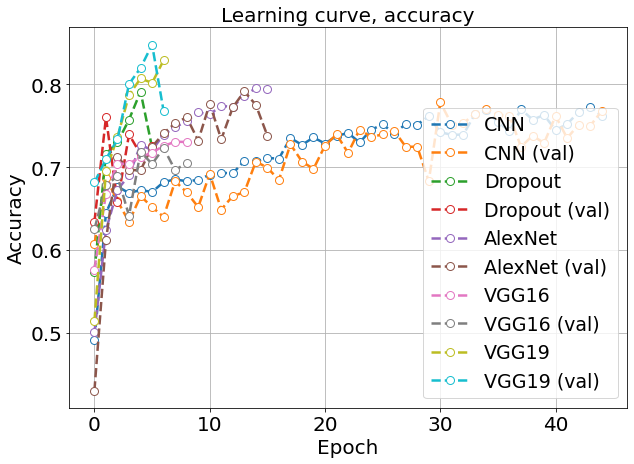

In [30]:
plot_learning_curves(
    names,
    histories_dict,
    figsize = (10, 7),
    metrics_name = 'acc',
    title = 'Learning curve, accuracy',
    ylabel = 'Accuracy',
    plot_validation = True
)

# Collect summarized metrics

In [15]:
def summarize_metrics(model_names, metrics_dict):
    available_names = list(metrics_dict.keys())
    
    for n in model_names:
        assert n in available_names

    series = [metrics_dict[name] for name in model_names]
    res = pd.concat(series, ignore_index = True)
    res = res.set_index('Unnamed: 0')
    return res

df_summary = summarize_metrics(
    model_names = names,
    metrics_dict = test_metrics_dict
)

df_summary.head()

,F1,data_eval_time_sec,data_size,precision,recall,test_accuracy,test_loss^(-1),tr_params,data_eval_time_sec_norm,tr_params_norm,test_loss^(-1)_norm
Unnamed: 0,,,,,,,,,,,
CNN,0.825702,323.020724,681.0,0.839124,0.829662,0.829662,0.771877,10788643.0,1.0,1.0,1.0
Dropout,0.775021,142.668023,681.0,0.820184,0.775330,0.775330,0.539591,12001059.0,1.0,1.0,1.0
AlexNet,0.877747,323.070328,681.0,0.881692,0.876652,0.876652,0.393449,62381347.0,1.0,1.0,1.0
VGG16,0.829111,442.816964,681.0,0.852415,0.831131,0.831131,0.473869,134272835.0,1.0,1.0,1.0
VGG19,0.870579,502.980399,681.0,0.877432,0.870778,0.870778,0.317239,139582531.0,1.0,1.0,1.0


# Performance metrics

In [16]:
performance_metrics = [
                   'test_accuracy',
                   'F1',
                   'precision',
                   'recall'
]

In [17]:
complexity_metrics = [
                   'tr_params',
                   'data_eval_time_sec',
                   'test_loss^(-1)'
]

In [18]:
def plot_metrics(df, metric_names, model_names, figsize = (15, 15), title = ''):

    fontsize = 22
    ticksize = 22
    legendsize = 18
    tick_freq = 0.1
    
    ax = df.loc[model_names, metric_names].plot.bar(
        rot = 0,
        width = 0.9,
        figsize = figsize
    )

    y_ticks = np.arange(0, 1.01, tick_freq)
    ax.set_yticks(y_ticks)


    ax.set_xlabel('', fontsize = fontsize)
    ax.set_ylabel('Metrics', fontsize = fontsize)

    ax.tick_params(axis = 'both', labelsize = ticksize)
    ax.set_title(title, fontsize = fontsize)

    ax.legend(bbox_to_anchor = (0.7, 0.18), fontsize = legendsize, loc = 'center', fancybox = True, framealpha = 0.94)
    ax.grid()

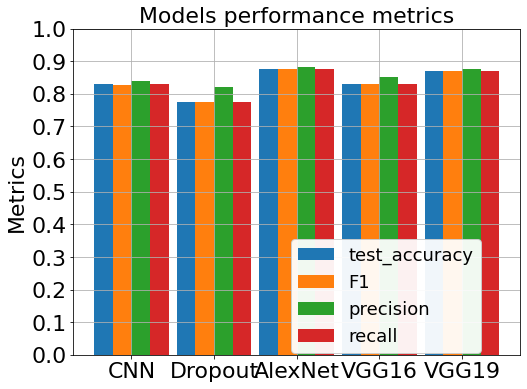

In [19]:
plot_metrics(
    df_summary, 
    performance_metrics,
    names,
    figsize = (8, 6),
    title = 'Models performance metrics'
)

In [20]:
# plot_metrics(
#     df_summary, 
#     performance_metrics,
#     ['CNN', 'Dropout'],
#     figsize = (6, 4),
#     title = ''
# )

# Complexity metrics

In [21]:
def plot_complexity_metrics(
    df,
    metric_names,
    model_names,
    figsize = (20, 20),
    title = ''
):

    # The complexity metrics are of different ranges 
    # and nature (time, number of parameters). We do max-normalization

    fontsize = 24
    ticksize = 22
    legendsize = 17
    tick_freq = 0.1

    df_subset = df.loc[model_names, metric_names]

    for m in metric_names:
        df_subset[m] = df_subset[m] / df_subset[m].max()  # Normalization
    
    ax = df_subset.plot.bar(
        rot = 0,
        width = 0.8,
        figsize = figsize
    )

    y_ticks = np.arange(0, 1.01, tick_freq)
    ax.set_yticks(y_ticks)


    ax.set_xlabel('', fontsize = fontsize)
    ax.set_ylabel('Complexity metrics', fontsize = fontsize)

    ax.tick_params(axis = 'both', labelsize = ticksize)
    ax.set_title(title, fontsize = fontsize)

    ax.legend(bbox_to_anchor = (0.7, 0.02), fontsize = legendsize, loc = 'lower center')
    ax.grid()

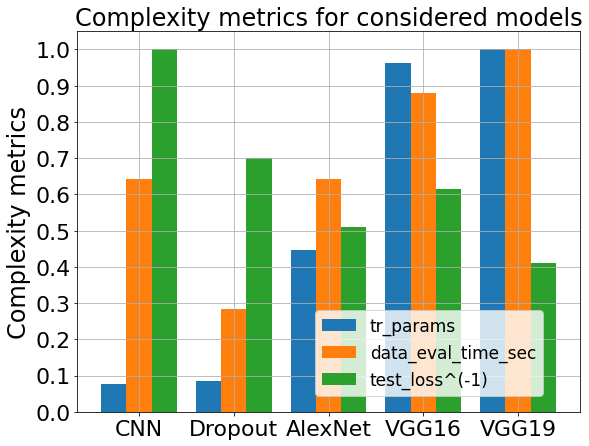

In [22]:
plot_complexity_metrics(
    df_summary, 
    complexity_metrics,
    names,
    figsize = (9, 7),
    title = 'Complexity metrics for considered models'
)

# Time per epoch

In [23]:
def visualize_time_per_epoch(
    train_times_dict, 
    model_names, 
    figsize = (8, 5),
    title = ''
):
    available_models = train_times_dict.keys()
    
    fig, ax = plt.subplots(figsize = figsize)
    legend_names = []

    plt_params_dict = dict(
        linestyle = '--',
        marker = 'o',
        markersize = 11,
        markerfacecolor = 'white',
        linewidth = 3
    )

    fontsize = 23
    legendsize = 17
    ticksize = 20
    tick_freq = 1
    x_lim = 15

    for model_name in model_names:
        assert model_name in available_models

        time_df = train_times_dict[model_name]
        assert model_name in time_df.columns
        
        time_data = train_times_dict[model_name][model_name].values
        time_data = time_data[time_data != ''][0]

        deltas = [
                  time_data[i] - time_data[i - 1] for i in range(1, len(time_data))
        ]
        deltas.insert(0, time_data[0])
        ax.plot(deltas, **plt_params_dict)

        legend_names.append(model_name)

    ax.grid()
    ax.legend(legend_names, fontsize = legendsize)
    
    ax.set_xlim((0, 15))
    ax.set_title(title, fontsize = fontsize)
    ax.set_xlabel('Epoch', fontsize = fontsize)
    ax.set_ylabel('Time per epoch, sec', fontsize = fontsize)
    ax.tick_params(axis = 'both', labelsize = ticksize)
    
    x_ticks = np.arange(0, x_lim, tick_freq)
    ax.set_xticks(x_ticks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


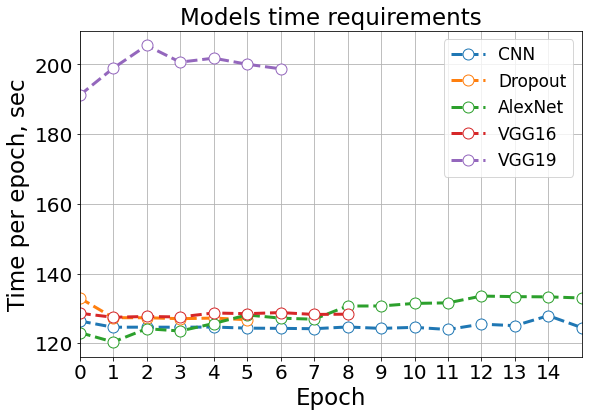

In [24]:
visualize_time_per_epoch(
    train_times_dict = train_time_dict,
    model_names = names,
    figsize = (9, 6),
    title = 'Models time requirements'
)

In [25]:
# visualize_time_per_epoch(
#     train_times_dict = train_time_dict,
#     model_names = ['VGG16', 'CNN', 'AlexNet'],
#     figsize = (8, 5),
#     title = 'Models time requirements'
# )

# Full learning time

In [26]:
def plot_overall_learning_times(
    train_times_dict, 
    model_names,
    figsize = (8, 6),
    title = 'SET TITLE'
):
    available_models = train_times_dict.keys()
    
    fig, ax = plt.subplots(figsize = figsize)
    legend_names = []

    plt_params_dict = dict(
        linewidth = 3
    )

    fontsize = 23
    legendsize = 17
    ticksize = 20
    tick_freq = 1
    x_lim = 15

    final_times = {}
    n_epochs = []
    for model_name in model_names:
        assert model_name in available_models

        time_df = train_times_dict[model_name]
        assert model_name in time_df.columns
        
        full_train_time = train_times_dict[model_name][model_name].values[-1]
        final_times[model_name] = full_train_time

        n_epochs.append(train_times_dict[model_name].shape[0])

    x = list(final_times.keys())
    y = list(final_times.values())
    
    for i in range(len(x)):
        plt.text(i, y[i]+0.3, f'{n_epochs[i]} epochs', fontsize = 19, ha = 'center')


    ax.bar(x, y, **plt_params_dict)

    ax.grid()    
    ax.set_title(title, fontsize = fontsize)
    ax.set_ylabel('Full training time, sec', fontsize = fontsize)
    ax.tick_params(axis = 'both', labelsize = ticksize)

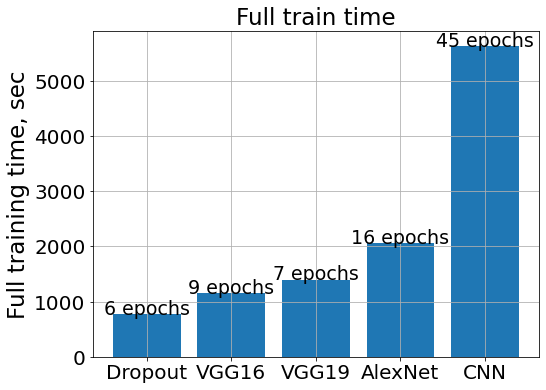

In [29]:
plot_overall_learning_times(
    train_time_dict, 
    model_names = [
                   'Dropout',
                   'VGG16',
                   'VGG19',
                   'AlexNet',
                   'CNN'
    ],
    figsize = (8, 6),
    title = 'Full train time'
)

# Download models

In [ ]:
DataProps = DataProperties(
    environment = env,
    n_trial = None
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def prepare_test_generator(input_shape, test_percentage = 0.99):
    test_generator = ImageDataGenerator(
        preprocessing_function = Preprocessing.preprocess,
        validation_split = 1 - test_percentage
    )

    test_flow = test_generator.flow_from_directory(
        directory = DataProps.test_data_path,
        target_size = input_shape,
        color_mode = 'rgb',
        classes = DataProperties.classes,
        class_mode = 'sparse',
        shuffle = DatasetParameters.shuffle_test,
        seed = DatasetParameters.seed,
        batch_size = 1,
        subset = 'training'
    )

    test_steps = test_flow.n // test_flow.batch_size

    print(f'Use {test_flow.n} images for test')
    print(f'Test steps: {test_steps}')

    return test_flow, test_steps

In [ ]:
def get_empty_models():
    res = {
        'CNN': CNNModel(name = 'CNN'),
        'VGG19': VGG19Model(name = 'VGG19'),
        'VGG16': VGG16Model(name = 'VGG16'),
        'BN': BNModel(name = 'BN_CNN'),
        'Dropout': DropoutModel(name = 'Dropout'),
        
        'AlexNetNoCLAHE': AlexNetModel(name = 'AlexNet'),
        'AlexNetCLAHE': AlexNetModel(name = 'AlexNet')
    }
    return res
    
def construct_utils(model_name):
    return ModelUtils(

        model_params_dict = dict(**model_params),

        checkpoint_params_dict = dict(
            filepath = f'{DataProps.checkpoint_path}{model_name}/',
            **checkpoint_params
        ),

        train_params_dict = dict(
            **train_params
        )
    )

def get_models(model_names):
    empty_models = get_empty_models()
    empty_model_names = list(empty_models.keys())
    res = {}

    for name in model_names:
        assert name in empty_model_names
        model = empty_models[name]
        utils = construct_utils(name)

        res.update(
            {
                name: {
                    'model': model,
                    'utils': utils
                }
            }
        )
    return res

In [ ]:
train_params = dict(
    train_flow = None, # no need here
    train_steps = None, # no need here
    val_flow = None, # no need here
    val_steps = None, # no need here
    epochs = None  # no need here
)

model_params = dict(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['acc'] 
)

checkpoint_params = dict(
    save_freq = 'epoch',
    save_weights_only = True,
    save_best_only = False,
    verbose = 1
)

In [ ]:
def reload_models(names, directory):
    res_dict = {}
    models = get_models(names)
    for name, model_parameters in models.items():
    
        model = model_parameters['model']
        utils = model_parameters['utils']
        
        model.construct_model()
        model.compile_model(**utils.model_params_dict)
        load_dir = f'{directory}{name}/{name}/{name}.h5'
    
        model.model.load_weights(load_dir)
        res_dict[name] = model
    
    return res_dict

In [ ]:
if using_gpu:
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        print(
            '\n\nThis error most likely means that this notebook is not '
            'configured to use a GPU.  Change this in Notebook Settings via the '
            'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
        raise SystemError('GPU device not found')

# Domain - related metrics

In [ ]:
comparison_path = f'{DataProps.core_path}SuccessfulTrials/'
models = reload_models(names, directory = comparison_path)

In [ ]:
input_sizes = {
    'VGG16': (224, 224),
    'VGG19': (224, 224),
    'AlexNet': (256, 256),
    'AlexNetCLAHE': (256, 256),
    'AlexNetNoCLAHE': (256, 256)
}

def get_input_shape(model_name):
    if model_name in input_sizes.keys():
        return input_sizes[model_name]
    else:
        return (300, 300)

In [ ]:
def plot_confusion_matrices(model_names, models_dict):
    for name in model_names:
        model = models_dict[name]
        input_shape = get_input_shape(name)
        print(f'Confustion matrix for {name}')
        test_flow, test_steps = prepare_test_generator(input_shape)
        
        test_flow.reset()
        if using_gpu:
            print(f'Computing with GPU')
            with tf.device(device_name):
                plot_confusion_matrix(
                    Y_true = test_flow.classes, 
                    Y_pred = model.flow_predict(
                        test_flow,
                        test_steps
                    ),
                    class_indices = test_flow.class_indices
                )
        else:
            plot_confusion_matrix(
                    Y_true = test_flow.classes, 
                    Y_pred = model.flow_predict(
                        test_flow,
                        test_steps
                    ),
                    class_indices = test_flow.class_indices
                )

In [ ]:
if 'CNN' in names:
    plot_confusion_matrices(
        model_names = ['CNN'],
        models_dict = models
    )

Confustion matrix for AlexNetCLAHE
Found 681 images belonging to 3 classes.
Use 681 images for test
Test steps: 681


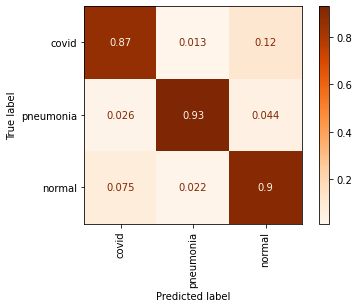

In [ ]:
if 'AlexNetCLAHE' in names:
    plot_confusion_matrices(
        model_names = ['AlexNetCLAHE'],
        models_dict = models
    )

In [ ]:
if 'Dropout' in names:
    plot_confusion_matrices(
        model_names = ['Dropout'],
        models_dict = models
    )

In [ ]:
if 'AlexNet' in names:
    plot_confusion_matrices(
        model_names = ['AlexNet'],
        models_dict = models
    )

In [ ]:
if 'VGG16' in names:
    plot_confusion_matrices(
        model_names = ['VGG16'],
        models_dict = models
    )

In [ ]:
if 'VGG19' in names:
    plot_confusion_matrices(
        model_names = ['VGG19'],
        models_dict = models
    )

# Layers interpretation

In [ ]:
def visualize_conv2D_work(
    model_name, 
    models_dict, 
    n_layer,
    n_kernel,
    image_number = 7
):

    input_shape = get_input_shape(model_name)
    print(f'Layers interpretation for {model_name}')
    
    test_flow, test_steps = prepare_test_generator(input_shape)

    image = test_flow[image_number][0][0]
    label = test_flow[image_number][1][0]

    for key, val in test_flow.class_indices.items():
        if val == int(label):
            print(f'Label: {key}')

    visualize_kernel_work(
        model = models_dict[model_name].model, 
        n_layer = n_layer, 
        n_kernel = n_kernel, 
        
        image = test_flow[image_number][0][0],
        label = test_flow[image_number][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )

Layers interpretation for AlexNetCLAHE
Found 681 images belonging to 3 classes.
Use 681 images for test
Test steps: 681
Label: covid
We have:
        3 by 3 kernel, 
        of 384 color channels,
        total: 384 kernels


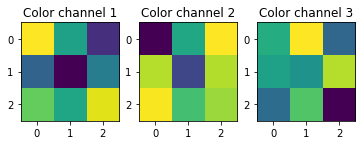

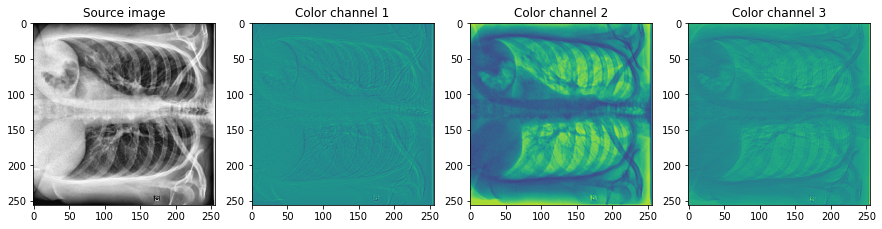

In [ ]:
visualize_conv2D_work(
    model_name = 'AlexNetCLAHE',
    models_dict = models,
    n_layer = 5,
    n_kernel = 5,
    image_number = 9
)

Layers interpretation for CNN
Found 681 images belonging to 3 classes.
Use 681 images for test
Test steps: 681
Label: covid
We have:
        3 by 3 kernel, 
        of 32 color channels,
        total: 64 kernels


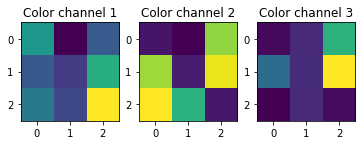

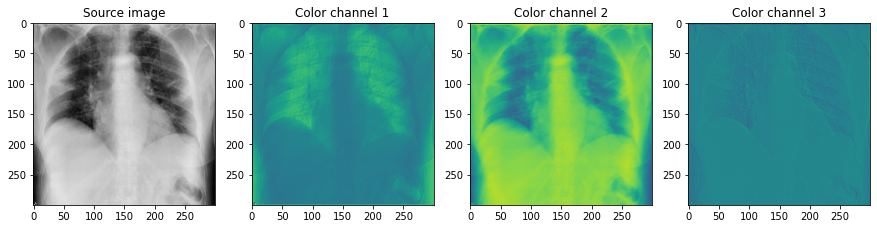

In [ ]:
visualize_conv2D_work(
    model_name = 'CNN',
    models_dict = models,
    n_layer = 4,
    n_kernel = 4,
    image_number = 7
)

Layers interpretation for AlexNet
Found 681 images belonging to 3 classes.
Use 681 images for test
Test steps: 681
Label: covid
We have:
        3 by 3 kernel, 
        of 384 color channels,
        total: 256 kernels


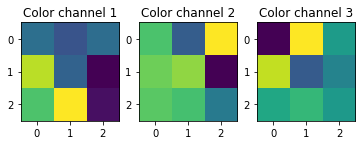

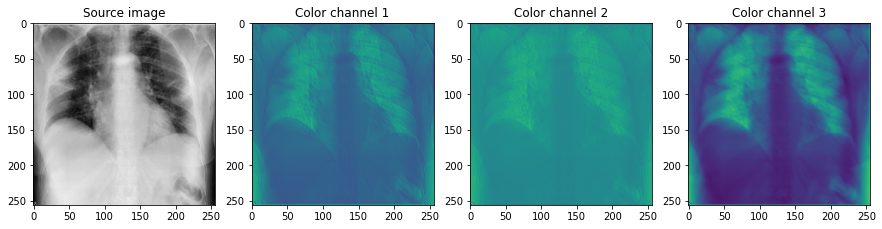

In [ ]:
visualize_conv2D_work(
    model_name = 'AlexNet',
    models_dict = models,
    n_layer = 6,
    n_kernel = 4,
    image_number = 7
)

In [40]:
# Memory
def plot_overall_memory(
    train_times_dict, 
    model_names,
    figsize = (8, 6),
    title = 'SET TITLE'
):
    available_models = train_times_dict.keys()
    
    fig, ax = plt.subplots(figsize = figsize)
    legend_names = []

    plt_params_dict = dict(
        linewidth = 3
    )

    fontsize = 23
    legendsize = 17
    ticksize = 20
    tick_freq = 1
    x_lim = 15

    final_times = {}
    n_epochs = []
    for model_name in model_names:
        assert model_name in available_models

        time_df = train_times_dict[model_name]
        assert model_name in time_df.columns
        
        full_train_time = train_times_dict[model_name][model_name].values[-1]
        final_times[model_name] = full_train_time

        n_epochs.append(train_times_dict[model_name].shape[0])

    x = list(final_times.keys())
    y = list(final_times.values())
    
    for i in range(len(x)):
        plt.text(i, y[i]+0.3, f'{n_epochs[i]} epochs', fontsize = 19, ha = 'center')


    ax.bar(x, y, **plt_params_dict)

    ax.grid()    
    ax.set_title(title, fontsize = fontsize)
    ax.set_ylabel('Full training time, sec', fontsize = fontsize)
    ax.tick_params(axis = 'both', labelsize = ticksize)

In [41]:
memories = {'CNN': 123,
     'Dropout': 137,
     'AlexNet': 238,
     'VGG16': 512.3,
     'VGG19': 1560
     }
df = pd.DataFrame(
    memories.values(), memories.keys()
)

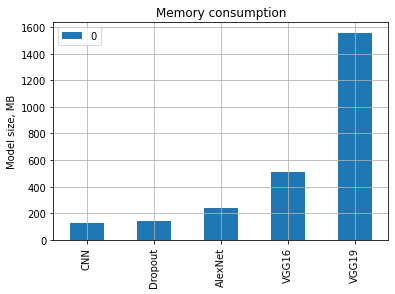

In [48]:
ax = df.plot.bar(
    title = 'Memory consumption'
)
ax.set_ylabel('Model size, MB')

ax.grid()

AttributeError: ignored

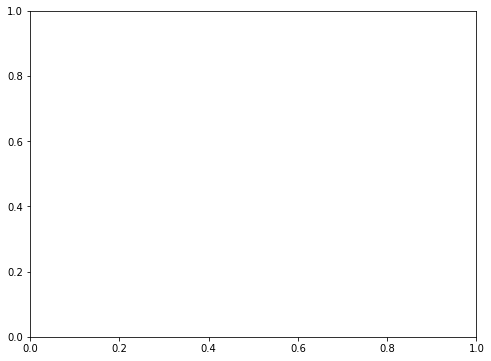

In [42]:
plot_overall_memory(
    memories, 
    model_names = [
                   'Dropout',
                   'VGG16',
                   'VGG19',
                   'AlexNet',
                   'CNN'
    ],
    figsize = (8, 6),
    title = 'Memory consumption'
)